In [2]:
import pydotplus
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.base import BaseEstimator
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn import tree
from scipy import optimize
from sklearn import datasets, cross_validation, metrics, neighbors
from matplotlib.colors import ListedColormap
from pandas import DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
with open('german_credit.csv') as f:
    x = [i for i in f]

In [4]:
for i in range(len(x)):
    if i > 0:
        x[i] = (x[i].split(','))
y = x[0]
x = x[1:]
targets = []
for i in range(len(x)):
    for j in range(len(x[i]) - 1):
        x[i][j] = int(x[i][j])
    x[i][len(x[i]) - 1] = int(x[i][len(x[i]) - 1][0])
    targets.append(x[i][0])
    x[i] = x[i][1:]

In [5]:
x = np.array(x)

In [6]:
y = y.split(',')

In [7]:
y[9] = y[9].replace('&', '')

In [8]:
y

['Creditability',
 'Account Balance',
 'Duration of Credit (month)',
 'Payment Status of Previous Credit',
 'Purpose',
 'Credit Amount',
 'Value Savings/Stocks',
 'Length of current employment',
 'Instalment per cent',
 'Sex  Marital Status',
 'Guarantors',
 'Duration in Current address',
 'Most valuable available asset',
 'Age (years)',
 'Concurrent Credits',
 'Type of apartment',
 'No of Credits at this Bank',
 'Occupation',
 'No of dependents',
 'Telephone',
 'Foreign Worker\n']

In [9]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(x, targets)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         feature_names=y[1:],
                         max_depth = 3,
                         class_names=['0', '1'],  
                         filled=True, rounded=True,  
                         special_characters=True)

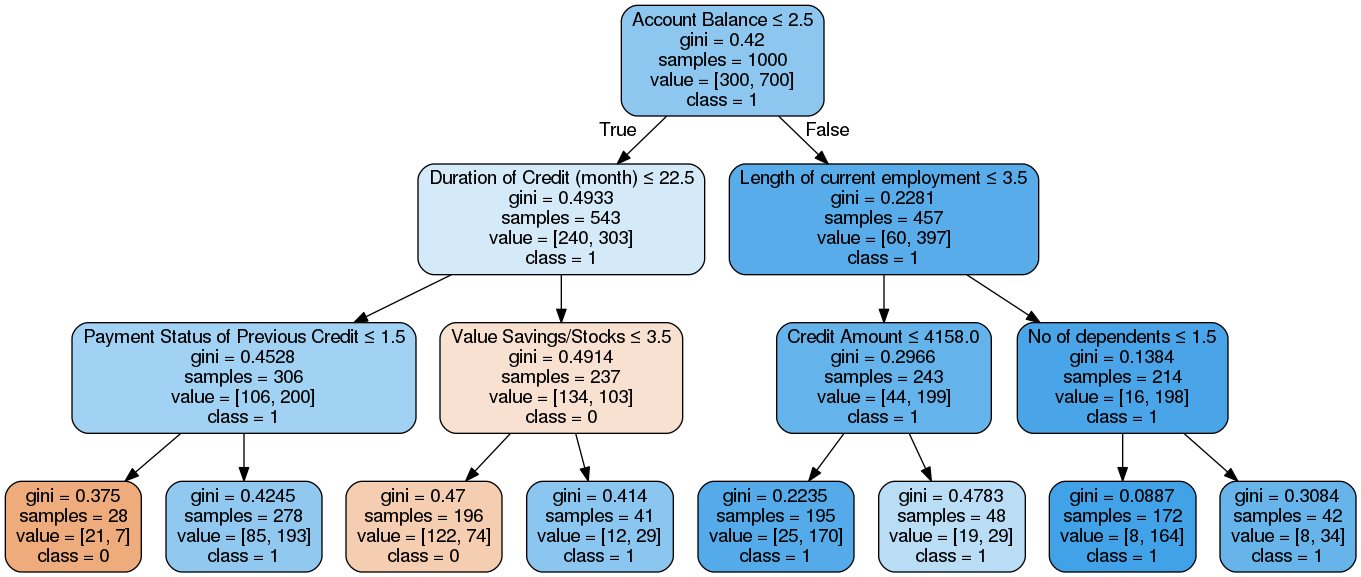

In [11]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())

#### Дерево наилучшим образом разбивает выборку по признакам. В первом узле разбиение выполнено по признаку, отвечающему за баланс пользователя. Причем видно, что в левой части появляются узлы, в которых алгоритм отвечает нулем, то есть кредит не выдается. Что неудивительно, так как баланс клиента низкий. То же самое можно сказать про длительность неоплаченного кредита и т.д.

In [13]:
depth_of_tree = np.linspace(1, 100, 100)
ac_cross = [0.0 for i in range(len(depth_of_tree))]
ac_train = [0.0 for i in range(len(depth_of_tree))]
for k in range(1, len(depth_of_tree)):
    model = tree.DecisionTreeClassifier(max_depth=k)
    model.fit(x, targets)
    ac_cross[k] = cross_validation.cross_val_score(model, x, targets).mean()
    ac_train[k] = accuracy_score(targets, model.predict(x))

(0, 1.1)

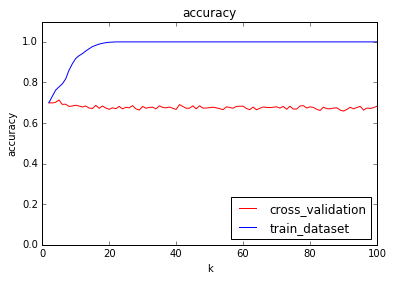

In [18]:
pyplot.plot(depth_of_tree[1:], ac_cross[1:], color = 'red', label = 'cross_validation')
pyplot.plot(depth_of_tree[1:], ac_train[1:], color = 'blue', label = 'train_dataset')
pyplot.xlabel("k")
pyplot.ylabel("accuracy")
pyplot.title("accuracy")
axis = pyplot.gca()
axis.legend(loc = 4)
pyplot.ylim(0, 1.1)

### На обучающей выборке качество быстро выходит на 1. А как же иначе? Ведь она обучающая. Алгоритм подогнался, и при достаточно большой глубине дерева выдает точные ответы. На кроссвалидации точность примерно 0.7 при всех k.